In [62]:
import pandas as pd #importa pandas para manipulação de dados
import numpy as np #importa numpy para operações numéricas
from pandas import json_normalize #importa json_normalize para normalizar dados JSON
from matplotlib import pyplot as plt #importa pyplot do matplotlib para visualização de dados  

Aula 1 - Acesso aos dados

In [63]:
url = 'https://github.com/alura-cursos/python-analise-chatgpt-assistente/raw/main/Dados/dados_vendas.json'# URL do arquivo JSON

In [64]:
df = pd.read_json(url)# Lê o arquivo JSON e cria um DataFrame
df.head()# Exibe as primeiras linhas do DataFrame

,item_identificador,loja_identificador,vendas_totais,item,loja
0,FDB08,OUT018,176503.58,"{'item_peso': 6.055, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
1,DRQ35,OUT049,185758.20,"{'item_peso': 9.3, 'item_conteudo_gordura': 'B...","{'loja_ano_estabelecimento': 2009, 'loja_taman..."
2,FDD14,OUT018,165983.94,"{'item_peso': 20.7, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
3,FDY37,OUT045,314923.40,"{'item_peso': 17.0, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2012, 'loja_taman..."
4,FDY59,OUT018,64782.34,"{'item_peso': 8.195, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."


In [65]:
df_item_normalized = json_normalize(df['item'])# Normaliza a coluna 'itens' do DataFrame
df_loja_normalized = json_normalize(df['loja'])# Normaliza a coluna 'loja' do DataFrame
df = pd.concat([df, df_item_normalized, df_loja_normalized], axis=1)# Concatena os DataFrames normalizados ao DataFrame original
df.drop(columns=['item', 'loja'], axis=1, inplace=True)# Remove as colunas originais 'itens' e 'loja'
df.head()# Exibe as primeiras linhas do DataFrame atualizado

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


Aula 2 - Exploração dos dados

In [66]:
df.head()# Exibe as primeiras linhas do DataFrame atualizado

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


In [67]:
colunas_info = (len(df.columns), df.shape[0])# Obtém o número de colunas e linhas do DataFrame
colunas_duplicadas =df.duplicated().sum()
print(f'Número de colunas: {colunas_info[0]}, Número de linhas: {colunas_info[1]}')# Exibe o número de colunas e linhas do DataFrame
print(f'Número de linhas duplicadas: {colunas_duplicadas}')# Exibe o número de linhas duplicadas no DataFrame

Número de colunas: 13, Número de linhas: 8550
Número de linhas duplicadas: 27


In [68]:
nulos_por_coluna = df.isnull().sum()# Obtém o número de valores nulos por coluna no DataFrame
print(f'Número de valores nulos por coluna:\n{nulos_por_coluna}')# Exibe o número de valores nulos por coluna


Número de valores nulos por coluna:
item_identificador             0
loja_identificador             0
vendas_totais                  0
item_peso                   1469
item_conteudo_gordura          0
item_visibilidade              0
item_tipo                      0
item_preco                     0
item_quantidade_venda       8550
loja_ano_estabelecimento       0
loja_tamanho                2417
loja_tipo_localizacao          0
loja_tipo                      0
dtype: int64


In [69]:
df.info()# Exibe informações sobre o DataFrame, como tipos de dados e contagem de valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8550 non-null   object 
 1   loja_identificador        8550 non-null   object 
 2   vendas_totais             8550 non-null   float64
 3   item_peso                 7081 non-null   float64
 4   item_conteudo_gordura     8550 non-null   object 
 5   item_visibilidade         8550 non-null   float64
 6   item_tipo                 8550 non-null   object 
 7   item_preco                8550 non-null   float64
 8   item_quantidade_venda     0 non-null      object 
 9   loja_ano_estabelecimento  8550 non-null   int64  
 10  loja_tamanho              6133 non-null   object 
 11  loja_tipo_localizacao     8550 non-null   object 
 12  loja_tipo                 8550 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 868.5+ KB


In [70]:
df.describe()# Exibe estatísticas descritivas do DataFrame

,vendas_totais,item_peso,item_visibilidade,item_preco,loja_ano_estabelecimento
count,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


In [71]:
df.nunique()# exibe o número de valores únicos em cada coluna do DataFrame

item_identificador          1559
loja_identificador            10
vendas_totais               3493
item_peso                    415
item_conteudo_gordura          5
item_visibilidade           7880
item_tipo                     16
item_preco                  4839
item_quantidade_venda          0
loja_ano_estabelecimento       9
loja_tamanho                   3
loja_tipo_localizacao          3
loja_tipo                      4
dtype: int64

In [72]:
df.columns.duplicated().sum()# Verifica se há colunas duplicadas no DataFrame
df.columns[df.columns.duplicated()]# Exibe os nomes das colunas duplicadas

Index([], dtype='object')

In [73]:
df.isnull().sum()# Verifica se há valores nulos em cada coluna do

item_identificador             0
loja_identificador             0
vendas_totais                  0
item_peso                   1469
item_conteudo_gordura          0
item_visibilidade              0
item_tipo                      0
item_preco                     0
item_quantidade_venda       8550
loja_ano_estabelecimento       0
loja_tamanho                2417
loja_tipo_localizacao          0
loja_tipo                      0
dtype: int64

In [74]:
print(df.columns)


Index(['item_identificador', 'loja_identificador', 'vendas_totais',
       'item_peso', 'item_conteudo_gordura', 'item_visibilidade', 'item_tipo',
       'item_preco', 'item_quantidade_venda', 'loja_ano_estabelecimento',
       'loja_tamanho', 'loja_tipo_localizacao', 'loja_tipo'],
      dtype='object')


In [75]:
df['item_conteudo_gordura'].unique()# Exibe os valores únicos na coluna 'item_conteudo_gordura'

array(['Baixo Teor de Gordura', 'Regular', 'BTG', 'reg',
       'baixo teor de gordura'], dtype=object)

In [76]:
df['item_conteudo_gordura'].value_counts()# Conta a frequência de cada valor único na coluna 'item_conteudo_gordura'

item_conteudo_gordura
Baixo Teor de Gordura    5101
Regular                  2902
BTG                       318
reg                       117
baixo teor de gordura     112
Name: count, dtype: int64

Aula 3 - Limpeza e tratamento

In [77]:
df.duplicated().sum()# Verifica se há linhas duplicadas no DataFrame
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')# Exibe o número de linhas duplicadas no DataFrame

Número de linhas duplicadas: 27


In [78]:
df.drop_duplicates(inplace=True)# Remove linhas duplicadas do DataFrame
df.duplicated().sum()# Verifica novamente se há linhas duplicadas após a remoção
print(f'Número de linhas duplicadas após remoção: {df.duplicated().sum()}')# Exibe o número de linhas duplicadas após a remoção

Número de linhas duplicadas após remoção: 0


In [79]:
df.columns.duplicated().sum()# Verifica se há colunas duplicadas no DataFrame
df.columns[df.columns.duplicated()]# Exibe os nomes das colunas duplicadas
print(f'Número de colunas duplicadas: {df.columns.duplicated().sum()}')# Exibe o número de colunas duplicadas no DataFrame

Número de colunas duplicadas: 0


In [80]:
df = df.loc[:, ~df.columns.duplicated()]# Remove colunas duplicadas, mantendo a primeira ocorrência
df.columns.duplicated().sum()# Verifica novamente se há colunas duplicadas após a remoção
print(f'Número de colunas duplicadas após remoção: {df.columns.duplicated().sum()}')# Exibe o número de colunas duplicadas após a remoção

Número de colunas duplicadas após remoção: 0


In [81]:
df.head()# Exibe as primeiras linhas do DataFrame atualizado após a remoção de colunas duplicadas

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


In [82]:
print(df.columns.tolist())



['item_identificador', 'loja_identificador', 'vendas_totais', 'item_peso', 'item_conteudo_gordura', 'item_visibilidade', 'item_tipo', 'item_preco', 'item_quantidade_venda', 'loja_ano_estabelecimento', 'loja_tamanho', 'loja_tipo_localizacao', 'loja_tipo']


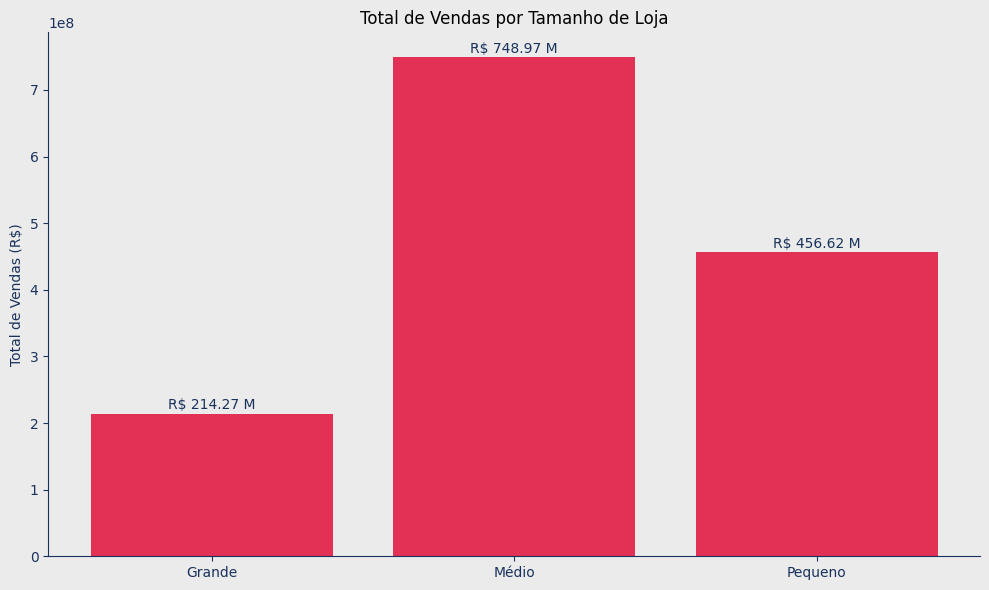

In [83]:

# Crie um DataFrame com os dados agrupados por tamanho de loja
df_agrupado = df.groupby('loja_tamanho')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras
barras = ax.bar(df_agrupado['loja_tamanho'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Tamanho de Loja')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.xaxis.label.set_color(cor_texto)

# Exibir o gráfico
plt.tight_layout()
plt.show()

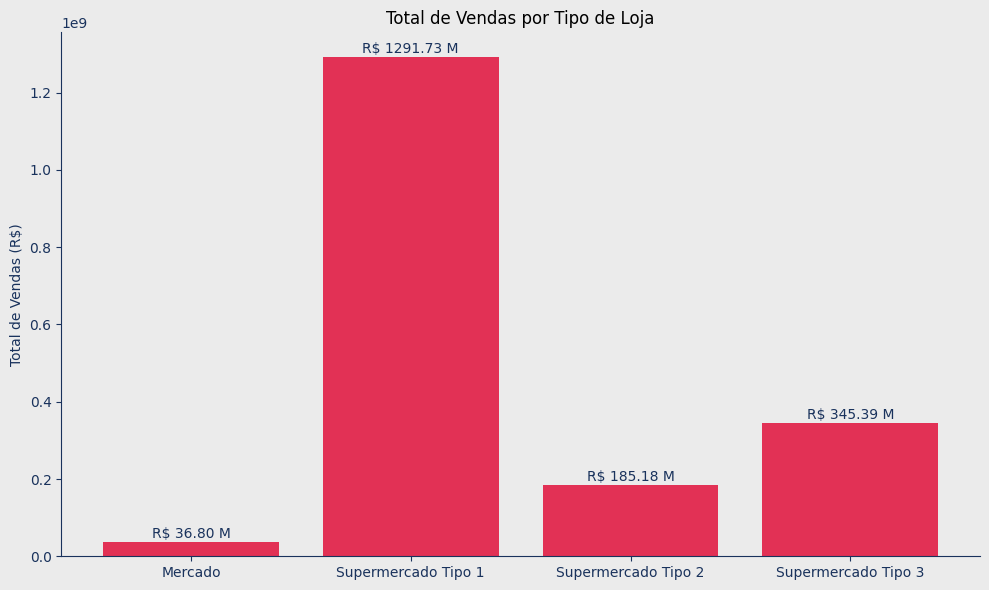

In [84]:

# Crie um DataFrame com os dados agrupados por tipo de loja
df_agrupado = df.groupby('loja_tipo')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras
barras = ax.bar(df_agrupado['loja_tipo'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Tipo de Loja')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.xaxis.label.set_color(cor_texto)

# Exibir o gráfico
plt.tight_layout()
plt.show()

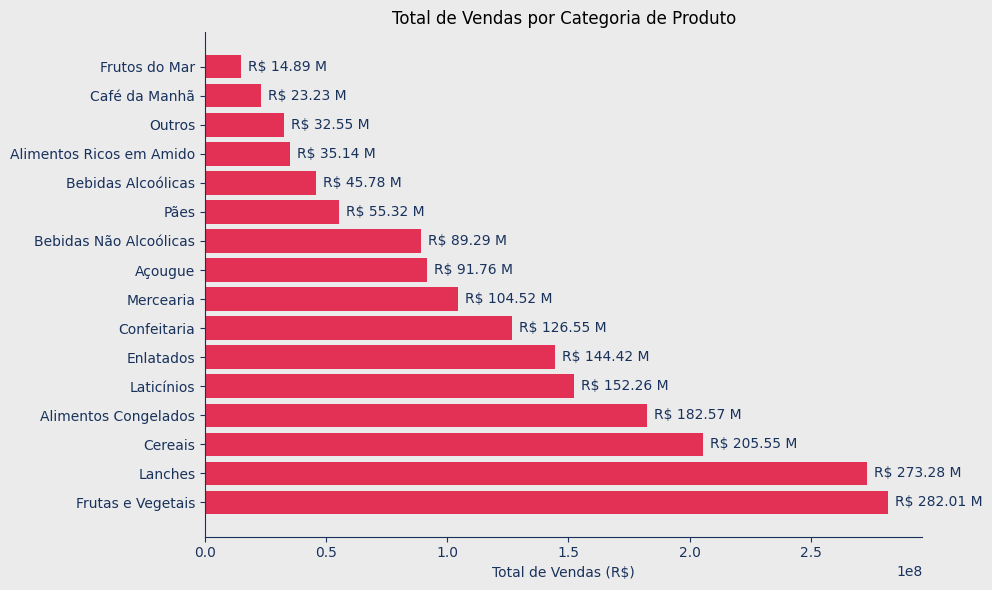

In [85]:
# Crie um DataFrame com os dados agrupados por categoria de produto
df_agrupado = df.groupby('item_tipo')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Ordenar o DataFrame por vendas totais (funil)
df_agrupado = df_agrupado.sort_values(by='vendas_totais', ascending=True)

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras horizontais
barras = ax.barh(df_agrupado['item_tipo'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas dentro de cada barra
for bar in barras:
    largura_barra = bar.get_width()
    valor_vendas = largura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(largura_barra, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', va='center', color=cor_texto)

# Configurações adicionais
ax.set_xlabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Categoria de Produto')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Inverter a ordem das categorias de produtos para manter o aspecto de funil
ax.invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()

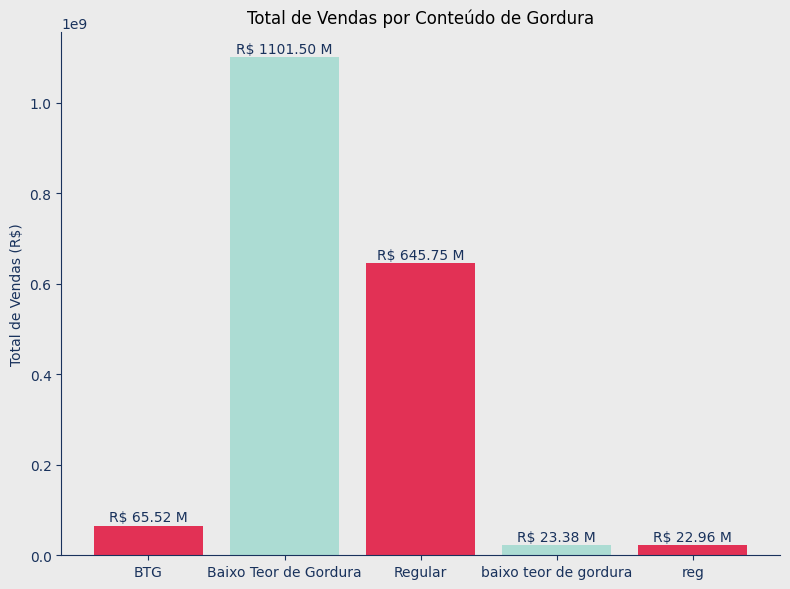

In [86]:
# Crie um DataFrame com os dados agrupados por categoria de quantidade de gordura
df_agrupado = df.groupby('item_conteudo_gordura')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_baixo_gordura = "#e23155"
cor_regular = "#acdcd3"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as colunas
barras = ax.bar(df_agrupado['item_conteudo_gordura'], df_agrupado['vendas_totais'],
                color=[cor_baixo_gordura, cor_regular])

# Adicione o total de vendas acima de cada coluna
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Conteúdo de Gordura')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()
